In [9]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
import seaborn as sns

In [81]:
path = 'Machine_Experiments/exp2/Lyapunov_eq_van_der_pool_2d_train_True'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_n_act = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_n_act, axis=0)
df = df.replace({'<function cos at 0x7ff6552a7550>': 'cos'})
acts = df['activation'].unique()
df

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n,mse
0,0,83.510120,63.768703,tanh,200,90,20.116735
1,1,83.462715,63.731853,tanh,200,90,20.116735
2,2,83.412460,63.692764,tanh,200,90,20.116735
3,3,83.358740,63.651190,tanh,200,90,20.116735
4,4,83.301280,63.607014,tanh,200,90,20.116735
...,...,...,...,...,...,...,...
99995,99995,51.066006,40.542484,relu,200,90,46.862694
99996,99996,50.921440,40.541073,relu,200,90,46.862694
99997,99997,50.936990,40.540108,relu,200,90,46.862694
99998,99998,50.811924,40.543198,relu,200,90,46.862694


In [82]:
df_small = df.groupby(['activation', 'n']).last().reset_index()

In [83]:
print(df_small[['activation', 'all_loss_values', 'all_test_loss_values', 'mse']].round(decimals=3).to_latex())

\begin{tabular}{llrrr}
\toprule
{} & activation &  all\_loss\_values &  all\_test\_loss\_values &     mse \\
\midrule
0 &        cos &            0.913 &                 1.347 &   1.360 \\
1 &        elu &            0.008 &                 8.051 &   9.047 \\
2 &       relu &           50.838 &                40.542 &  46.863 \\
3 &       selu &            0.143 &                 4.805 &   5.956 \\
4 &       tanh &            0.083 &                17.241 &  20.117 \\
\bottomrule
\end{tabular}



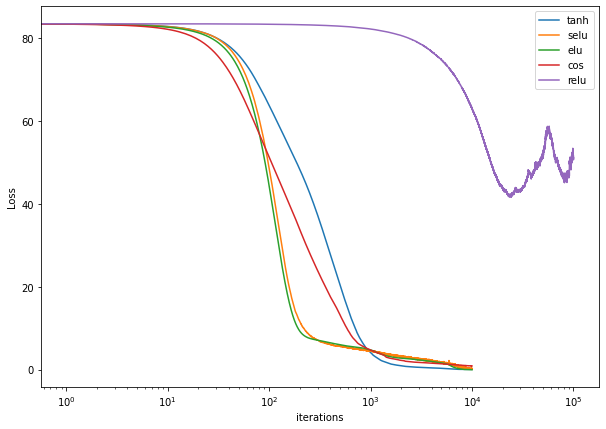

In [84]:
plt.figure(figsize=(10,7))
for act in acts:
    plt.plot(df[df['activation'] == act]['all_loss_values'], label = act)
plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Plots/multi_act.pdf')
plt.show()

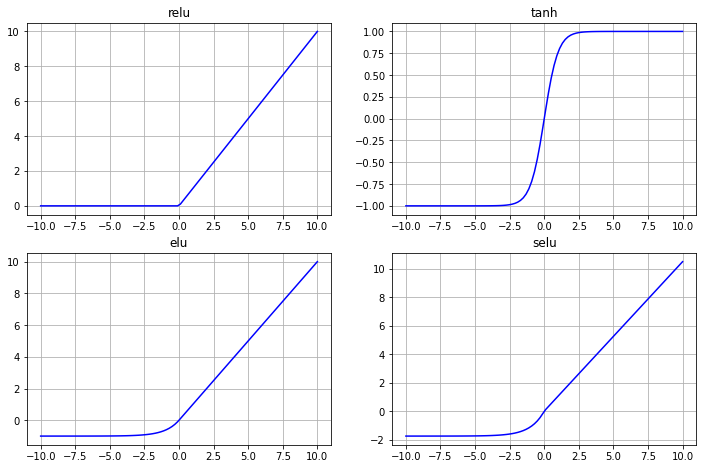

In [96]:
# Plot example activation functions
import tensorflow as tf

x = np.linspace(-10, 10, 100)
fig = plt.figure(figsize=(12, 12))
for i, activation in enumerate(['relu', 'tanh', 'elu', 'selu',]):
    row = (i % 2) + 1
    col = (i // 2) + 1
    fig.add_subplot(3, 2, i + 1)
    plt.grid()
    plt.title("{}".format(activation))
    plt.plot(x, getattr(tf.keras.activations, activation)(x), c='b')
plt.savefig('Plots/ill_act.pdf')
plt.show()

In [85]:
path = 'Machine_Experiments/exp2/Lyapunov_eq_van_der_pool_2d_train_False (1)'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_n_act = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_n_act, axis=0)
df

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n,mse
0,0,83.510120,50.081020,<function cos at 0x7f197fd86550>,5000,90,0.978378
1,1,70.363080,42.740170,<function cos at 0x7f197fd86550>,5000,90,0.978378
2,2,60.407840,36.943752,<function cos at 0x7f197fd86550>,5000,90,0.978378
3,3,52.637466,32.298462,<function cos at 0x7f197fd86550>,5000,90,0.978378
4,4,46.425850,28.527758,<function cos at 0x7f197fd86550>,5000,90,0.978378
...,...,...,...,...,...,...,...
9995,9995,5.844958,3.569188,<function cos at 0x7f197fd86550>,20,90,4.165223
9996,9996,5.844955,3.569195,<function cos at 0x7f197fd86550>,20,90,4.165223
9997,9997,5.844952,3.569203,<function cos at 0x7f197fd86550>,20,90,4.165223
9998,9998,5.844948,3.569211,<function cos at 0x7f197fd86550>,20,90,4.165223


In [86]:
all_ms = np.sort(df['m'].unique())

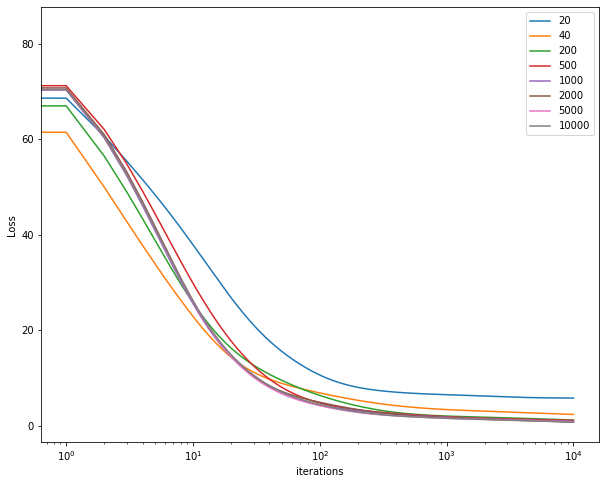

In [88]:
plt.figure(figsize=(10,8))
for m in all_ms:
    plt.plot(df[df['m'] == m]['all_loss_values'], label = m)
plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Plots/multi_ms.pdf')
plt.show()

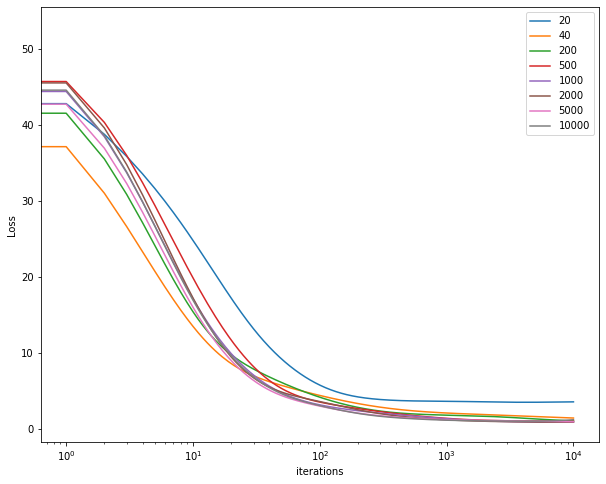

In [89]:
plt.figure(figsize=(10,8))
for m in all_ms:
    plt.plot(df[df['m'] == m]['all_test_loss_values'], label = m)
plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
df_small = df.groupby(['m']).last().reset_index()
print(df_small[['m', 'mse']].round(decimals=3).T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &       0 &       1 &        2 &        3 &         4 &         5 &         6 &          7 \\
\midrule
m   &  20.000 &  40.000 &  200.000 &  500.000 &  1000.000 &  2000.000 &  5000.000 &  10000.000 \\
mse &   4.165 &   1.625 &    1.112 &    1.054 &     0.965 &     0.938 &     0.978 &      1.346 \\
\bottomrule
\end{tabular}



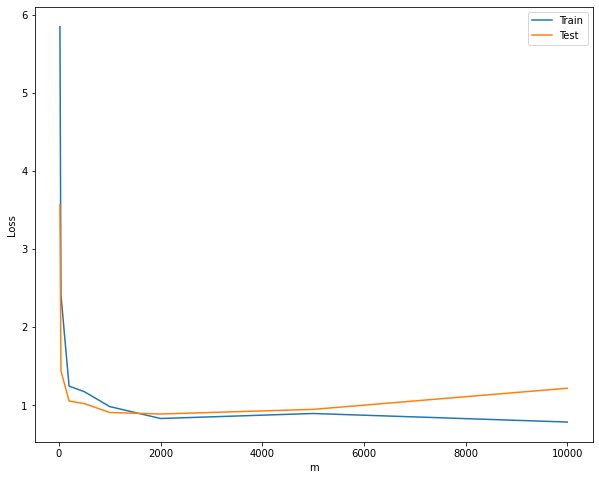

In [92]:
plt.figure(figsize=(10,8))
plt.plot(df_small['m'], df_small['all_loss_values'], label = 'Train')
plt.plot(df_small['m'], df_small['all_test_loss_values'], label = 'Test')
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.savefig('Plots/multi_m_test.pdf')
plt.show()